# Reading RADOLAN RX and RY filterd products
-----------------------------------------

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wradlib as wrl
% matplotlib inline


/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/home/velibor/anaconda2/envs/wradlib/lib/python2.7/site-packages/ipykernel/pylab/config.py:95: DeprecationW

# Read CSV with pandas
------------------

In [60]:
# read CSV and create a data frame with time index from Unnamed: 0
dfr = pd.read_csv('/automount/ags/velibor/data/radolan/rxy_20090101000000-20091231235000.csv')
dfrr = dfr.set_index(pd.DatetimeIndex(dfr[u'Unnamed: 0']))

# Drop Unnamed: 0 Column
dfrr = dfrr.drop([u'Unnamed: 0'],axis=1)




# View data set in taublar and as statistics
------------------------------------------


In [61]:
# view Columns and time index
print (dfrr.columns)
print (dfrr.index)

# Data as tabular
print (dfrr)



Index([u'RX', u'RY', u'zgrids_me', u'zgrids_st', u'zgrids_co', u'rgrids_>0',
       u'rgrids_0-1', u'rgrids_1-5', u'rgrids_5-10', u'rgrids_>10', u'rsum'],
      dtype='object')
DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:05:00',
               '2009-01-01 00:10:00', '2009-01-01 00:15:00',
               '2009-01-01 00:20:00', '2009-01-01 00:25:00',
               '2009-01-01 00:30:00', '2009-01-01 00:35:00',
               '2009-01-01 00:40:00', '2009-01-01 00:45:00',
               ...
               '2009-12-31 23:05:00', '2009-12-31 23:10:00',
               '2009-12-31 23:15:00', '2009-12-31 23:20:00',
               '2009-12-31 23:25:00', '2009-12-31 23:30:00',
               '2009-12-31 23:35:00', '2009-12-31 23:40:00',
               '2009-12-31 23:45:00', '2009-12-31 23:50:00'],
              dtype='datetime64[ns]', length=105119, freq=None)
                     RX  RY  zgrids_me  zgrids_st  zgrids_co  rgrids_>0  \
2009-01-01 00:00:00   1   1     556715      24547     

In [4]:
# Data Statistics
print (dfrr.describe())

                  RX             RY      zgrids_me      zgrids_st  \
count  105407.000000  105407.000000  105407.000000  105407.000000   
mean        0.995380       0.995029  550536.107052   47576.996632   
std         0.067815       0.070332   19489.536394   53839.107101   
min         0.000000       0.000000   55758.000000       0.000000   
25%         1.000000       1.000000  554786.000000    7000.500000   
50%         1.000000       1.000000  556840.000000   28889.000000   
75%         1.000000       1.000000  556840.000000   69918.000000   
max         1.000000       1.000000  810000.000000  451137.000000   

           zgrids_co      rgrids_>0     rgrids_0-1     rgrids_1-5  \
count  105407.000000  105407.000000  105407.000000  105407.000000   
mean     3505.374909   44105.580104   43186.505754     178.719943   
std     34053.554523   65776.243063   58005.381393     869.855749   
min         0.000000     127.000000     120.000000       0.000000   
25%        81.000000    4515.0000

# Determination of time periods
---------------------------------------------

In [ ]:
# select start end end time
#tstart, tend= '20120515140000','20120515150000'

#dfrr = dfrr[tstart:tend]

# Calculation of precentages
--------------------------------------------

In [ ]:
# Availabilty of RX and RY Products
rx = dfrr[u'RX'].replace(0,np.nan)
ry = dfrr[u'RY'].replace(0,np.nan)

# Propotion of grid points with real measurements 
anteil_gemessen = (rx*ry)*(dfrr[u'zgrids_me']/(900*900))*100

# Propotion of grid points with stratiform measurements 
anteil_stratiform = (rx*ry)*(dfrr[u'zgrids_st']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with convective measurements 
anteil_convective = (rx*ry)*(dfrr[u'zgrids_co']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with RR > 0 mm/h
anteil_RR0 = (rx*ry)*(dfrr[u'rgrids_>0']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with 0 mm/h < RR < 1 mm/h
anteil_RR01 = (rx*ry)*(dfrr[u'rgrids_0-1']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with 1 mm/h < RR < 5 mm/h
anteil_RR15 = (rx*ry)*(dfrr[u'rgrids_1-5']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with 5 mm/h < RR < 10 mm/h
anteil_RR510 = (rx*ry)*(dfrr[u'rgrids_5-10']/dfrr[u'zgrids_me'])*100

# Propotion of grid points with RR > 10 mm/h
anteil_RR10 = (rx*ry)*(dfrr[u'rgrids_>10']/dfrr[u'zgrids_me'])*100
rsum = (rx*ry)*dfrr[u'rsum']

# Plot
--------

In [ ]:
plt.figure(figsize=(20,14))
plt.subplot(3,1,1)
anteil_gemessen.plot()
#rx.plot(color='grey', lw=3)
#ry.plot(color='orange', lw=3, linestyle='-.')

plt.grid()
plt.ylabel(r'%')
plt.title('Anteil des wirklich gemessenen RADOLAN Grid')

plt.subplot(3,1,2)
anteil_stratiform.plot.area(stacked=False,label='stratiform')
anteil_convective.plot.area(stacked=False,label='convective')
plt.legend()
plt.grid()
plt.ylabel(r'%')
plt.title('Anteil Stratiform- Convectiv')


plt.subplot(3,1,3)
anteil_RR0.plot(label='RR > 0 in mm/h')
anteil_RR01.plot(label=' 0 > RR > 1 in mm/h')
anteil_RR15.plot(label='1 > RR > 5 in mm/h')
anteil_RR510.plot(label='5 > RR > 10 in mm/h')
anteil_RR10.plot(label='RR > 10 in mm/h')
plt.title('Anteil verschiedener Regenraten')
plt.ylabel(r'%')
plt.ylim(-1,101)
rx.plot(color='grey', lw=3)
ry.plot(color='orange', lw=3, linestyle='-.')
plt.legend()
plt.grid()


plt.tight_layout()
plt.show()

In [28]:
dfrr[u'rsum'].resample('W',how='mean')

2008-01-06    2764.651163
2008-01-13    2243.944821
2008-01-20    4979.533006
2008-01-27    4469.942128
2008-02-03    1710.458626
2008-02-10    2957.396314
2008-02-17      44.750734
2008-02-24    1059.477239
2008-03-02    6967.127634
2008-03-09    1888.607391
2008-03-16    6542.956498
2008-03-23    3651.965308
2008-03-30    2726.626647
2008-04-06    3731.842054
2008-04-13    4601.927046
2008-04-20    3067.042455
2008-04-27    2710.314896
2008-05-04    5019.611705
2008-05-11     531.013061
2008-05-18    4120.241260
2008-05-25    1110.299921
2008-06-01    3447.212222
2008-06-08    5652.802832
2008-06-15    4891.450516
2008-06-22    3241.556677
2008-06-29    2962.648046
2008-07-06    5666.121181
2008-07-13    8822.953666
2008-07-20    5067.808547
2008-07-27    3512.415724
2008-08-03    4884.081161
2008-08-10    6305.475198
2008-08-17    7431.282128
2008-08-24    8527.510526
2008-08-31     519.236751
2008-09-07    8229.651042
2008-09-14    2577.498730
2008-09-21     723.882564
2008-09-28  

In [47]:
dfrr[u'rsum'].resample('M', how='mean')

2008-01-31    3308.756704
2008-02-29    2137.393021
2008-03-31    4104.524037
2008-04-30    4201.824400
2008-05-31    2289.215402
2008-06-30    3977.539128
2008-07-31    5655.825534
2008-08-31    5760.905450
2008-09-30    3530.383389
2008-10-31    4090.800110
2008-11-30    2702.924028
2008-12-31    1561.530829
Freq: M, Name: rsum, dtype: float64

(0, 23)

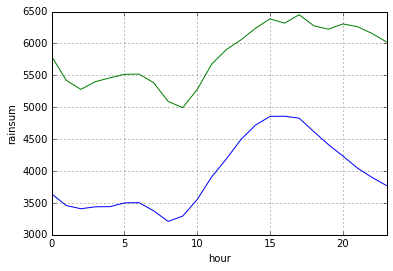

In [66]:
plt.plot(dfrr[u'rsum'].groupby(dfrr[u'rsum'].index.hour).mean())
plt.plot(dfrr[u'rsum'].groupby(dfrr[u'rsum'].index.hour).std())

plt.grid()
plt.xlabel('hour')
plt.ylabel('rainsum')
plt.xlim(0,23)

In [65]:
dfrr[u'rsum'].groupby(dfrr[u'rsum'].index.hour).mean()

0     3642.113879
1     3458.517263
2     3408.797352
3     3438.860220
4     3441.440039
5     3500.074331
6     3504.545076
7     3377.026573
8     3209.763802
9     3293.623637
10    3554.643171
11    3911.486445
12    4189.682642
13    4494.806710
14    4719.705119
15    4856.929990
16    4859.581354
17    4828.945006
18    4619.525425
19    4416.219018
20    4235.844759
21    4046.823048
22    3900.486221
23    3772.318664
Name: rsum, dtype: float64